In [61]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn

In [20]:
data_root = Path("/Volumes/Samsung_T5/MIT/abcd/release_05/abcd-data-release-5.1")
mh_section = "core/mental-health"
var_section = "variables"
parent = 'mh_p_cbcl.csv'
#child = 'mh_p_cbcl.csv'
mapping = 'cbcl_p.csv'
p_data_path = Path(data_root, mh_section, parent)
#y_data_path = Path(data_root, mh_section, child) 
mapping_path = Path(data_root, var_section, mapping) 

p_data = pd.read_csv(p_data_path)
#y_data = pd.read_csv(y_data_path)
mapp = pd.read_csv(mapping_path)

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_75902/3241936826.py:11: DtypeWarning: Columns (124,128,132,136,140,144,148,152,156,160,164,168,172,176,180,184,188,192,196,200) have mixed types. Specify dtype option on import or set low_memory=False.
  p_data = pd.read_csv(p_data_path)


In [26]:
p_data.head()

,src_subject_id,eventname,cbcl_select_language___1,cbcl_q01_p,cbcl_q02_p,cbcl_q03_p,cbcl_q04_p,cbcl_q05_p,cbcl_q06_p,cbcl_q07_p,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,cbcl_scr_07_stress_nm_2
0,NDAR_INV003RTV85,baseline_year_1_arm_1,0,0,0,0,0,0,0,0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
1,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,0,0,0,0,0,0,0,0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
2,NDAR_INV003RTV85,2_year_follow_up_y_arm_1,0,0,0,0,0,0,0,0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
3,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,0,0,0,0,0,0,0,0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
4,NDAR_INV005V6D2C,baseline_year_1_arm_1,1,0,0,0,0,0,0,0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN


In [27]:
p_data_base = p_data.query("eventname == 'baseline_year_1_arm_1'")


,src_subject_id,eventname,cbcl_select_language___1,cbcl_q01_p,cbcl_q02_p,cbcl_q03_p,cbcl_q04_p,cbcl_q05_p,cbcl_q06_p,cbcl_q07_p,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,cbcl_scr_07_stress_nm_2
0,NDAR_INV003RTV85,baseline_year_1_arm_1,0,0,0,0,0,0,0,0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
4,NDAR_INV005V6D2C,baseline_year_1_arm_1,1,0,0,0,0,0,0,0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
8,NDAR_INV007W6H7B,baseline_year_1_arm_1,0,0,0,1,0,0,0,1,...,0.0,3.0,60.0,NaN,0.0,4.0,54.0,NaN,0.0,NaN
11,NDAR_INV00BD7VDC,baseline_year_1_arm_1,0,0,0,1,1,0,0,1,...,0.0,4.0,64.0,NaN,0.0,4.0,54.0,NaN,0.0,NaN
14,NDAR_INV00CY2MDM,baseline_year_1_arm_1,0,1,0,2,1,0,0,1,...,0.0,0.0,50.0,NaN,0.0,7.0,62.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48715,NDAR_INVZZNX6W2P,baseline_year_1_arm_1,0,0,0,1,0,1,0,0,...,0.0,0.0,50.0,NaN,0.0,3.0,51.0,NaN,0.0,NaN
48720,NDAR_INVZZPKBDAC,baseline_year_1_arm_1,0,0,0,0,0,0,0,0,...,0.0,0.0,50.0,NaN,0.0,1.0,50.0,NaN,0.0,NaN
48725,NDAR_INVZZZ2ALR6,baseline_year_1_arm_1,0,0,0,1,0,0,0,0,...,0.0,1.0,51.0,NaN,0.0,1.0,50.0,NaN,0.0,NaN
48730,NDAR_INVZZZNB0XC,baseline_year_1_arm_1,0,1,0,0,1,0,0,0,...,0.0,1.0,51.0,NaN,0.0,1.0,50.0,NaN,0.0,NaN


In [57]:
cols_sc = [col for col in p_data.columns if col.startswith("cbcl_scr_")] # extract global scores 
p_sc = p_data[cols_sc]
p_sc

,cbcl_scr_syn_anxdep_r,cbcl_scr_syn_anxdep_t,cbcl_scr_syn_anxdep_m,cbcl_scr_syn_anxdep_nm,cbcl_scr_syn_withdep_r,cbcl_scr_syn_withdep_t,cbcl_scr_syn_withdep_m,cbcl_scr_syn_withdep_nm,cbcl_scr_syn_somatic_r,cbcl_scr_syn_somatic_t,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,cbcl_scr_07_stress_nm_2
0,0.0,50.0,NaN,0.0,1.0,52.0,NaN,0.0,0.0,50.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
1,0.0,50.0,NaN,0.0,1.0,52.0,NaN,0.0,0.0,50.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
2,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,1.0,53.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
3,0.0,50.0,NaN,0.0,1.0,51.0,NaN,0.0,0.0,50.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
4,1.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,0.0,50.0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48732,1.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,2.0,57.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
48733,0.0,50.0,NaN,0.0,1.0,52.0,NaN,0.0,1.0,53.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
48734,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,0.0,50.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN
48735,0.0,50.0,NaN,0.0,1.0,51.0,NaN,0.0,2.0,56.0,...,0.0,0.0,50.0,NaN,0.0,0.0,50.0,NaN,0.0,NaN


In [60]:
map_vars_sc = dict(zip(cols_sc, [mapp[mapp["var_name"] == col]["var_label"] for col in cols_sc]))
map_vars_sc

{'cbcl_scr_syn_anxdep_r': 120    AnxDep CBCL Syndrome Scale (raw score) = cbcl_...
 Name: var_label, dtype: object,
 'cbcl_scr_syn_anxdep_t': 121    AnxDep CBCL Syndrome Scale (t-score)
 Name: var_label, dtype: object,
 'cbcl_scr_syn_anxdep_m': 122    AnxDep CBCL Syndrome Scale (missing values)
 Name: var_label, dtype: object,
 'cbcl_scr_syn_anxdep_nm': 123    AnxDep CBCL Syndrome Scale (number of missing ...
 Name: var_label, dtype: object,
 'cbcl_scr_syn_withdep_r': 124    WithDep CBCL Syndrome Scale (raw score)
 Name: var_label, dtype: object,
 'cbcl_scr_syn_withdep_t': 125    WithDep CBCL Syndrome Scale (t-score)
 Name: var_label, dtype: object,
 'cbcl_scr_syn_withdep_m': 126    WithDep CBCL Syndrome Scale (missing values)
 Name: var_label, dtype: object,
 'cbcl_scr_syn_withdep_nm': 127    WithDep CBCL Syndrome Scale (number of missing...
 Name: var_label, dtype: object,
 'cbcl_scr_syn_somatic_r': 128    Somatic CBCL Syndrome Scale (raw score)
 Name: var_label, dtype: object,
 'cbc

In [89]:
col_raw = [col for col in p_sc.columns if col.endswith("r")]
col_t = [col for col in p_sc.columns if col.endswith("t")]
p_sc_raw = p_sc[col_raw]
p_sc_t = p_sc[col_t]
col_t

['cbcl_scr_syn_anxdep_t',
 'cbcl_scr_syn_withdep_t',
 'cbcl_scr_syn_somatic_t',
 'cbcl_scr_syn_social_t',
 'cbcl_scr_syn_thought_t',
 'cbcl_scr_syn_attention_t',
 'cbcl_scr_syn_rulebreak_t',
 'cbcl_scr_syn_aggressive_t',
 'cbcl_scr_syn_internal_t',
 'cbcl_scr_syn_external_t',
 'cbcl_scr_syn_totprob_t',
 'cbcl_scr_dsm5_depress_t',
 'cbcl_scr_dsm5_anxdisord_t',
 'cbcl_scr_dsm5_somaticpr_t',
 'cbcl_scr_dsm5_adhd_t',
 'cbcl_scr_dsm5_opposit_t',
 'cbcl_scr_dsm5_conduct_t',
 'cbcl_scr_07_sct_t',
 'cbcl_scr_07_ocd_t',
 'cbcl_scr_07_stress_t']

<Axes: xlabel='cbcl_scr_syn_anxdep_t', ylabel='count'>

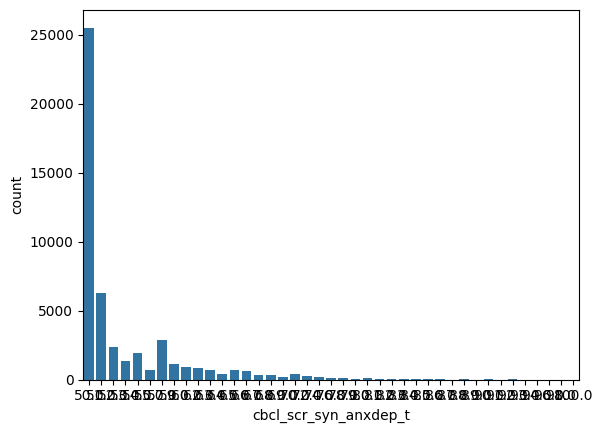

In [86]:
seaborn.countplot(x = 'cbcl_scr_syn_anxdep_t', data= p_sc_t)

<Axes: xlabel='cbcl_scr_syn_rulebreak_t', ylabel='count'>

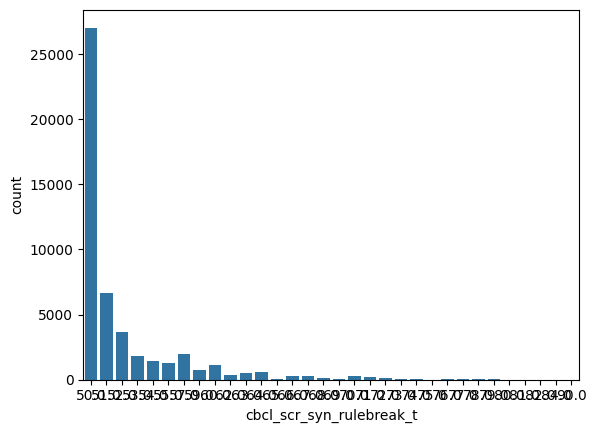

In [90]:
seaborn.countplot(x = 'cbcl_scr_syn_rulebreak_t', data= p_sc_t)